# Introduction à la bioacoustique

La bioacoustique, c'est l'étude des signaux sonores produits par les animaux.
Dans cette activité, vous allez manipuler des signaux sonores pour découvrir les principaux concepts de la bioacoustique.

## Etape 1 : L'enregistrement des sons

Avant de pouvoir étudier les signaux sonores produits par les animaux, il faut les enregistrer sur le terrain. Cela nécessite du matériel (microphone, enregistreur, etc) et une logistique plus ou moins complexe (animaux difficiles à approcher, lieux difficiles d'accès, etc.).

Dans cette activité, vous allez enregistrer vos propres voix avec le microphone de vos ordinateurs et les étudier avec des outils simples de bioacoustique.

**Exercice**
Vous allez enregistrer vos voix. Rendez-vous sur ce site [ce site](https://online-voice-recorder.com/fr).

![Page d'accueil du site web online-voice-reocrder.com](images/voice_recorder_1.png)

Enregistrez les phonèmes suivants en cinq exemplaires : un long **"AAAAA"**, un long **"EEEEE"**, un long **"IIIII"**, un long **"OOOOO"**, un long **"UUUUU"**, et un long **"FFFFF"**.

Il vous faut cinq exemplaires de chaque son. Essayez de produire des sons de deux secondes, et laissez un peu de silence avant et après vos voix.

Pour aller plus vite, vous pouvez faire un long enregistrement où vous prononcez chaque son une fois, puis enregistrer chaque son individuellement en déplaçant les bornes bleues de l'intervale à l'écran.

![Apparence du site web online-voice-recorder.com après un enregistrement](images/voice_recorder_2.png)

Renommez vos fichers avec le format suivant : **SON_NOM_NUMERO** (par exemple, "AAAAA_BENTI_3.mp3").
Cliquez sur l'icone dossier en haut à gauche de cette page internet (voir capture d'écran ci-dessous), et glissez-déposez vos enregistrements dans le dossier "enregistrements".

Envoyez-moi vos enregistrements par mail (benjamin.benti@protonmail.com) pour que je prépare le bilan de l'activité.

![Localisation des enregistrements locaux dans le notebook](images/depot_enregistrements.png)

## Etape 2 :  La caractérisation des sons.

### Bon, c'est quoi au juste, un son ?

Maintenant que vous avez vos enregistrements, vous allez pouvoir analyser vos voix.
Concrètement, à quoi ressemblent-elles ?

In [4]:
# Code python pour le prétraitement et l'harmonisation des enregistrements.
# Vous n'avez pas besoin de regarder les sections de code dans le détail.
# Si ça vous intéresse ou si vous avez des questions, vous pouvez m'envoyer un mail : benjamin.benti@protonmail.com

%matplotlib inline

# Import des librairies nécessaires pour le traitement audio et la visualisation
import pathlib
import random as rd
import numpy as np
import pandas as pd
import librosa as lib
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as sig
import ipywidgets as widgets

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def get_preprocess_audiofiles(audio_folder):
    """
    Explore audio-folder and pre-process audio recordings within.
    Return pandas.DataFrame with name and sound type (from file name) and preprocessed sound
    """
    # Récupérer la liste des fichiers.
    if isinstance(audio_folder, str):
        audio_folder = pathlib.Path(audio_folder)
    file_list = [f for f in audio_folder.glob("*.mp3")]

    # Prétraitement des enregistrements : filtre bande-bassante entre 50 et 4000 Hz, downsampling à 8000 Hz, harmonisation.
    df = pd.DataFrame(columns=['ind', 'type', 'sound'], dtype=object)
    for i, f in enumerate(file_list):
        # Charger l'enregistrement.
        y, sr = sf.read(f)

        # Construction d'un filtre bande-passante entre 50 Hz et 4000 Hz.
        sos = sig.butter(4, (50, 4000), btype="bp", output="sos", fs=sr)
        # Filtrer les enregistrements.
        y_filt = sig.sosfilt(sos, y, axis=0)

        # Harmoniser la fréquence d'échantillonage de tous les enregistrements à 8000 Hz.
        y_ds = sig.decimate(y_filt, round(sr/8000), axis=0)
        
        # Harmoniser l'amplitude des enregistrements.
        norm = np.max(np.abs(y_ds))
        y_harm = y_ds / norm
        
        # Stocker les enregistrements prétraités dans la base de données.
        fn = str(f)
        type = fn.split('/')[-1].split('_')[0]
        ind = fn.split('/')[-1].split('_')[1]
        df.loc[i, 'ind'] = ind
        df.loc[i, 'type'] = type
        df.loc[i, 'sound'] = y_harm

    return df

data = get_preprocess_audiofiles(pathlib.Path('enregistrements'))


In [2]:
# Code python pour la visualisation des enregistrements.
from IPython.display import display

def waveform_selecttime(y, sr, xlimits=(0, 2.5)):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot([i/sr for i in range(len(y))], y)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (u. a.)')
    ax.set_xlim(xlimits)
    plt.show()

y = rd.choice(data.sound)  # Choisir un enregistrement au hasard.

xlimits=widgets.FloatRangeSlider(min=0, max=3, step=0.001, value=(0, 2.5))
out = widgets.interactive_output(waveform_selecttime, {'y': widgets.fixed(y),
                                                       'sr': widgets.fixed(8000),
                                                       'xlimits': xlimits})
widgets.VBox([xlimits, out])


Un son, c'est un ensemble de vibrations de l'air : des fluctuations de pression de différentes fréquences et de différentes amplitudes.

Quand on enregistre un son, on obtient une forme d'onde, qui représente ces fluctuations au cours du temps. C'est un format plutôt obscur, il est difficile d'en extraire directement des informations.

Text(0.5, 1.0, 'Mini-quizz : quel est ce son ?')

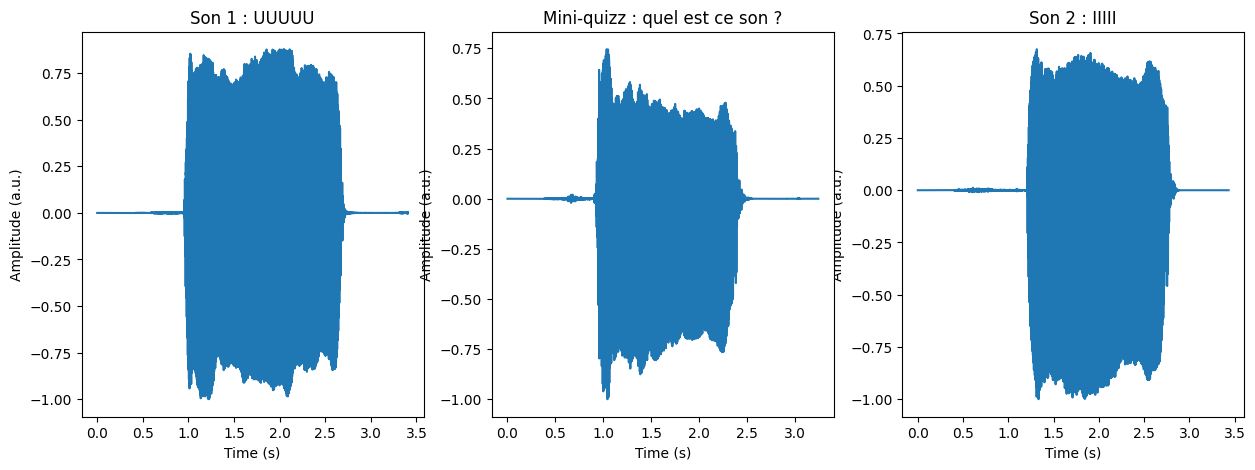

In [2]:
# Code python - mini-quizz sur les formes d'onde.

# Choisir des sons au hasard.
son1 = rd.choice(list(set(data.type)))
same = True
while same:
    son2 = rd.choice(list(set(data.type)))
    same = (son2 == son1)

ex1 = rd.choice(data.loc[data.type==son1].index)
ex2 = rd.choice(data.loc[data.type==son2].index)
same = True
while same:
    ex3 = rd.choice(pd.concat((data.loc[data.type==son1], data.loc[data.type==son2])).index)
    same = (ex3 == ex1 or ex3 == ex2)

# Construire la figure.
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)

y1 = data.loc[ex1, 'sound']
ax1.plot([i/8000 for i in range(len(y1))], y1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (a.u.)')
y2 = data.loc[ex2, 'sound']
ax2.plot([i/8000 for i in range(len(y2))], y2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (a.u.)')
y3 = data.loc[ex3, 'sound']
ax3.plot([i/8000 for i in range(len(y3))], y3)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude (a.u.)')

ax1.set_title('Son 1 : {}'.format(data.loc[ex1, 'type']))
ax2.set_title('Son 2 : {}'.format(data.loc[ex2, 'type']))
ax3.set_title('Mini-quizz : quel est ce son ?')


In [3]:
# Résultat du quizz.
print('Le son mystère était...')
print('drum rolls...')
print(data.loc[ex3, "type"])

Le son mystère était...
drum rolls...
IIIII


### Un outil magique pour visualiser et analyser les sons : le **spectrogramme**

On a vu qu'un son est un ensemble de fluctuations de pression à différentes amplitudes et à différentes fréquences. Il est très difficile d'évaluer ces fréquences et ces amplitudes en regardant la forme d'onde.

En bioacoustique, l'outil principal que l'on utilise pour mieux caractériser les sons, c'est le **spectrogramme**. C'est une transformation mathématique des sons qui permet de voir la composition en fréquences d'un son.

Text(0.5, 1.0, "Spectrogramme d'un IIIII")

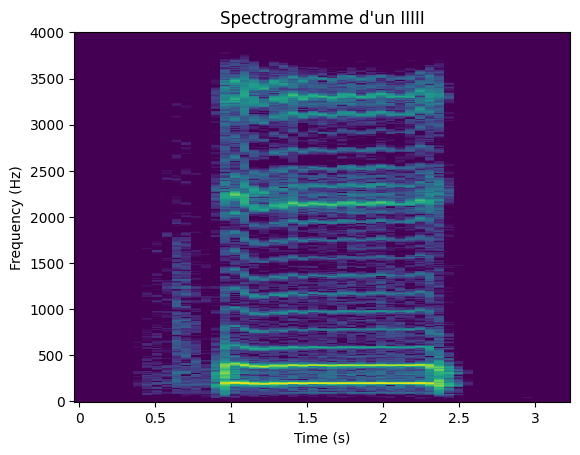

In [4]:
# Code python pour le calcul et la visualisation des spectrogrammes.

def custom_spectro(signal, nfft=1024, ovlp=0.5, win='hann'):
    """
    Computes the spectrogram of a signal using the input parameters.
    """
    wind = sig.get_window(win, nfft)
    S = lib.stft(signal, n_fft=nfft, hop_length=round(nfft*ovlp), window=wind)
    return S

def plot_spectro(S, sr, nfft, ovlp, fig, ax, cmap='viridis'):
    """
    Plots a spectrogram.
    """
    img = lib.display.specshow(lib.amplitude_to_db(np.abs(S), ref=np.max),
                               sr=sr, n_fft=nfft, hop_length=round(nfft*ovlp),
                               ax=ax, y_axis='linear', x_axis='time', cmap="viridis"
                               )    
    return fig, ax

# Construire le spectrogramme du son du quizz précédent.
S = custom_spectro(data.loc[ex3, 'sound'])
fig = plt.figure()
ax = fig.add_subplot()
plot_spectro(S, 8000, 1024, 0.5, fig, ax)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title("Spectrogramme d'un {}".format(data.loc[ex3, 'type']))

Dans les sons animaux, la distribution des fréquences n'est pas aléatoire.

In [5]:
# Code python pour l'analyse de la distribution des fréquences.

def magnitude_lines(y, sr, F0, xmax=4000, fig=None, ax=None):
    if fig is None:
        fig = plt.figure()
    if ax is None:
        ax = fig.add_subplot()
    ax.magnitude_spectrum(y, Fs=8000)
    for i in range(1, 100):
        if F0*i <= 4000:
            ax.axvline(F0*i, color='black')
    ax.set_xlim(0, xmax)
    plt.show()

F0 = widgets.IntSlider(description='F0', min=0, max=300, step=1, value=0)
xmax = widgets.IntSlider(description='Fmax', min=500, max=4000, step=500, value=4000)
out = widgets.interactive_output(magnitude_lines, {'y': widgets.fixed(data.loc[ex3, 'sound']),
                                                   'sr': widgets.fixed(8000),
                                                   'F0': F0,
                                                   'xmax': xmax
                                                   }
                                )
widgets.VBox([widgets.HBox([F0, xmax]), out])

### A vous de jouer !!

Utilisez le code de la cellule suivante pour mesurer, pour chacun de vos enregistrements :
- la fréquence fondamentale **F0**: utilisez le défilement pour aligner les lignes verticales avec les pics de magnitude sur le graphique de droite. Faites glisser le marqueur de droite pour zoomer et mieux aligner les lignes sur les pics de fréquence.
- la fréquence d'intensité maximale **Fmax**: elle sera indiquée sous les graphiques.

Notez les paramètres acoustiques de votre voix dans un fichier CSV (vous pouvez faire un tableur avec Excel ou LibrOffice et l'enregistrer au format CSV avec l'option "Fichier -> Enregistrer sous...").
Les colonnes de votre tableau doivent s'appeler : 
- **NOM** -> votre nom
- **F_G_X** -> votre genre, si vous souhaitez l'indiquer
- **type_de_son** -> le phonème prononcé, en majuscules avec 5 lettres (ex. "AAAAA")
- **numero** -> l'exemplaire du son, de 1 à 5
- **F0** -> la valeur de la fréquence fondamentale
- **Fmax** -> la valeur de la fréquence maximale.


In [7]:
# Code python pour la mesure des paramètres acoustiques de vos voix.

# Mise à jour de la base de données avec vos enregistrements.
audio_folder = pathlib.Path('enregistrements')
data = get_preprocess_audiofiles(audio_folder)

# Widgets avec menu déroulant pour sélectionner l'enregistrement.
liste_noms = list(set(data.ind))
nom = widgets.Dropdown(options=liste_noms, value=liste_noms[0], description='Nom :')
liste_sons = list(set(data.type))
son = widgets.Dropdown(options=liste_sons, value=liste_sons[0], description='Type de son :')
liste_numeros = [i+1 for i in range(5)]
numero = widgets.Dropdown(options=liste_numeros, value=liste_numeros[0], description='n° :')

# Widgets sliders pour la fréquence fondamentale.
F0 = widgets.IntSlider(description='F0 :', min=0, max=300, step=1, value=0)
xmax = widgets.IntSlider(description='Fmax :', min=500, max=4000, step=500, value=4000)

def get_acoustic_features(ind, soundtype, nb, F0, xmax, data=data):
    """
    Get sound exemplar nb for individual ind and vowel soundtype.
    Plots spectrogram on the left and magnitude spectrum + lines on the right.
    Prints Fmax in bottom.
    """
    # Get sound.
    y = data.loc[data.ind==ind].loc[data.type==soundtype].iloc[nb-1].sound

    # Prepare figure.
    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))

    # Plot spectrogram.
    S = custom_spectro(y)
    plot_spectro(S, 8000, 1024, 0.5, fig, ax1)
    ax1.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_title("Spectrogram")
    
    # Mesure la fréquence fondamentale.
    magnitude_lines(y, sr=8000, F0=F0, xmax=xmax, fig=fig, ax=ax2)

    plt.show()

out = widgets.interactive_output(get_acoustic_features, {'ind': nom, 'soundtype': son, 'nb': numero,
                                                         'F0': F0, 'xmax': xmax
                                                          }
                                 )

def get_fmax(ind, soundtype, nb):
    """Get Fmax from sound recording"""
    # Get sound.
    y = data.loc[data.ind==ind].loc[data.type==soundtype].iloc[nb-1].sound
    
    # Mesurer la fréquence maximale.
    s, f, l = plt.magnitude_spectrum(y, Fs=8000)
    plt.close()
    print('La fréquence maximale de ce son est {} Hz'.format(round(f[np.argmax(s)])))

out2 = widgets.interactive_output(get_fmax, {'ind': nom, 'soundtype': son, 'nb': numero})


widgets.VBox([widgets.HBox([nom, son, numero]), widgets.HBox([F0, xmax]), out, out2])


#### Etape 3 : Analyser les variations sonores

Maintenant que nous avons :
1. Enregistré des sons et
2. Mesuré des paramètres acoustiques sur ces enregistrements,

nous pouvons procéder à des comparaisons intra- et inter-individuelles pour répondre à des questions biologiques.

### Analyse de vos enregistrements

In [75]:
def plot_acoustic_features(individuals, sounds, col, tab=tab):
    """
    Plot F0 and Fmax for all soundtypes and all inds, mark by individual and color by sound type.
    """

    # Prepare figure.
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    colorset = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d", "#666666"]
    markerset = ["o", "+", "s", "d", "v", 'x', '8', 'p']
    
    if col == 'sons':  # Color by sound types.
        for i, elt in enumerate(sounds):
            tmp = tab.loc[tab.type_de_son==elt]
            for j, k in enumerate(individuals):
                tmp2 = tmp.loc[tmp.NOM==k]
                ax.plot(tmp2.F0, tmp2.Fmax, color=colorset[i], marker=markerset[j], linewidth=0, label='{}-{}'.format(elt, k), markersize=10, markeredgewidth=2.5)
    elif col == 'individus':  # Color by individuals.
        for i, elt in enumerate(individuals):
            tmp = tab.loc[tab.NOM==elt]
            for j, k in enumerate(sounds):
                tmp2 = tmp.loc[tmp.type_de_son==k]
                ax.plot(tmp2.F0, tmp2.Fmax, color=colorset[i], marker=markerset[j], linewidth=0, label='{}-{}'.format(elt, k), markersize=10, markeredgewidth=2.5)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')
    return fig, ax

In [51]:
# Code pour représenter les mesures réalisées sur les différents types de sons.
#  Ouvrir le tableau comprenant les mesures pour l'ensemble des enregistrements.
tab = pd.read_csv('mesures/TOTAL_mesures.csv')

# Widgets à checker pour sélectionner les individus à indiquer à l'écran.
individus = [widgets.Checkbox(value=False, description=nom) for nom in list(set(tab.NOM))]
out_inds = widgets.VBox(children=individus)

# Widgets à checker pour inclure les différents types de sons.
sons = [widgets.Checkbox(value=False, description=son) for son in list(set(tab.type_de_son))]
out_sons = widgets.VBox(children=sons)

# Widget avec menu déroulant pour sélectionner le groupement pour la coloration.
coloring = widgets.Dropdown(options=['individus', 'sons'], value='sons', description='Colorer par :')

params = widgets.HBox([out_inds, out_sons, coloring])
display(params)

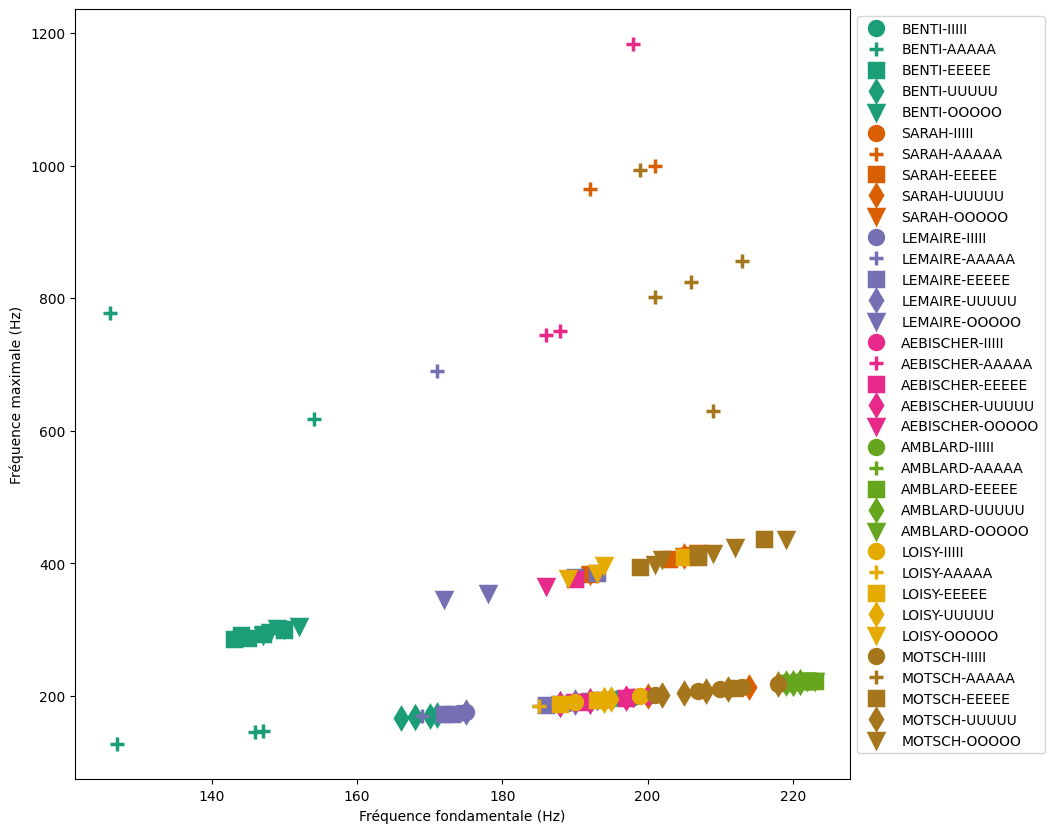

In [77]:
selected_inds = []
for i in range(len(individus)):
    if individus[i].value == True:
        selected_inds.append(str(individus[i].description))

selected_sounds = []
for i in range(len(sons)):
    if sons[i].value == True:
        selected_sounds.append(str(sons[i].description))

selected_col = coloring.value

fig, ax = plot_acoustic_features(selected_inds, selected_sounds, selected_col, tab=tab)
plt.show()